In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def plot_corpus_word_lengths(corpus, corpus_name):
    lengths = [len(w) for w in corpus]
    bins = np.arange(min(lengths), max(lengths) + 2) - 0.5
    plt.hist(lengths, bins=bins, edgecolor='black')
    plt.xlabel('Word Length')
    plt.xticks(np.arange(min(lengths), max(lengths) + 1, 1))
    plt.ylabel('Count')
    plt.title(f'{corpus_name} by word length')

In [19]:
word_df = pd.read_csv('words.txt', sep=" ", header=0)
word_df.head()
words_corpus = word_df['WORD']

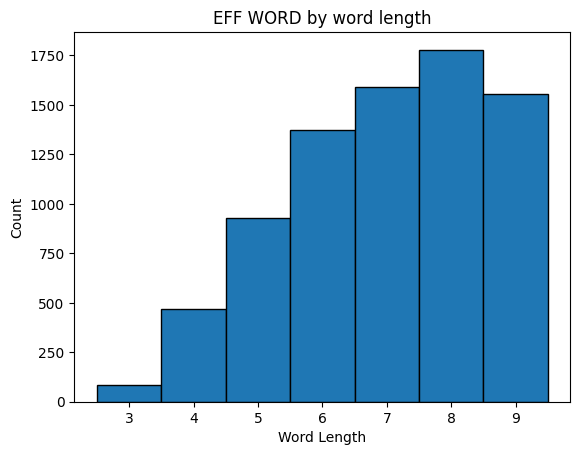

In [20]:
eff_word_df = pd.read_csv('eff_large_wordlist.txt', sep="\t", header=0)
eff_corpus = eff_word_df['word']
plot_corpus_word_lengths(eff_corpus, 'EFF WORD')

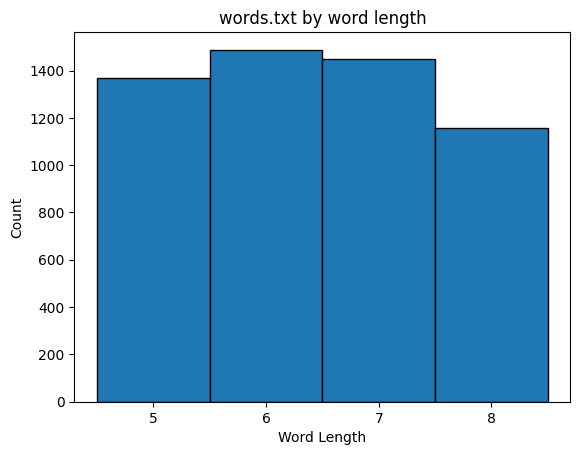

In [21]:
plot_corpus_word_lengths(words_corpus, 'words.txt')

11754
1481
10197


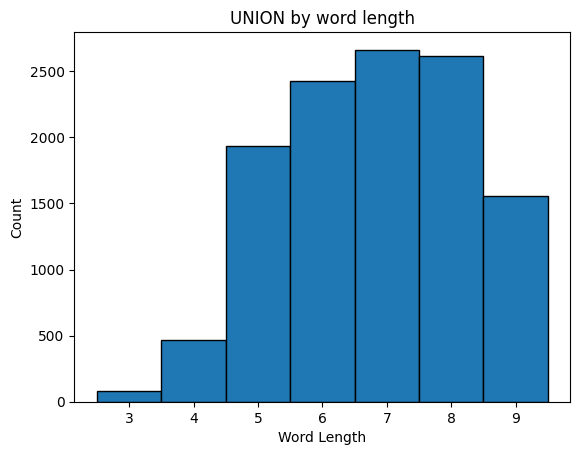

In [42]:
def union_corpuses(corp1, corp2):
    set1, set2 = set(corp1), set(corp2)
    unique_words = list(set1.union(set2))
    intersection_words = list(set1.intersection(set2))
    return unique_words, intersection_words

union_corpus, duplicates = union_corpuses(words_corpus, eff_corpus)

print(len(union_corpus))
print(len(duplicates))

plot_corpus_word_lengths(union_corpus, 'UNION')

print(np.sum(np.array([len(w) for w in union_corpus]) <= 8))

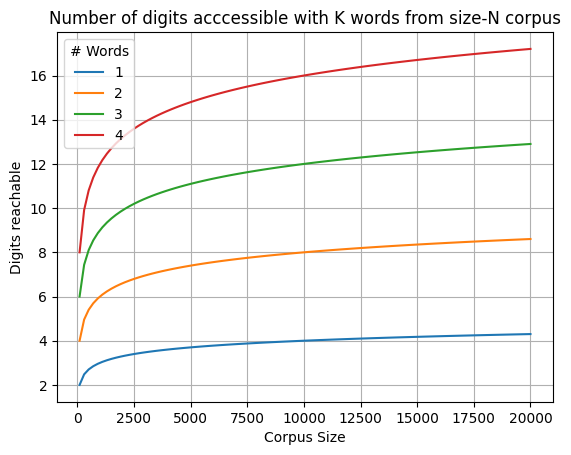

In [41]:
num_words = np.linspace(100, 20_000, num=100)
powers = np.array([1, 2, 3, 4])
max_digits = np.log10(np.array([np.power(num_words, p) for p in powers]))

for i, d in enumerate(max_digits):
    plt.plot(num_words, d, label=powers[i])
plt.xlabel('Corpus Size')
plt.ylabel('Digits reachable')
plt.title('Number of digits acccessible with K words from size-N corpus')
plt.grid()
plt.legend(title='# Words')

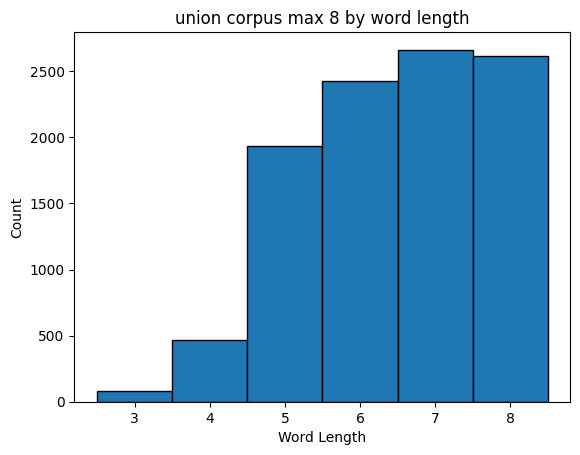

In [43]:
union_corpus_max_8 = [w for w in union_corpus if len(w) <= 8]
plot_corpus_word_lengths(union_corpus_max_8, 'union corpus max 8')

In [ ]:
# union_corpus_max_8[:5]
import random
random.seed(613)
random.shuffle(union_corpus_max_8)
print(union_corpus_max_8[:50])


['pushed', 'machine', 'primer', 'curves', 'rising', 'armoire', 'spur', 'sulfate', 'strip', 'surveys', 'shuffle', 'grower', 'measured', 'rust', 'bobcat', 'given', 'slush', 'cobalt', 'unloader', 'athletes', 'lugged', 'andrew', 'diamond', 'scrap', 'alkalize', 'celibacy', 'valve', 'rumble', 'upturned', 'lawyers', 'eggshell', 'filename', 'sliver', 'charm', 'sprang', 'relocate', 'allowing', 'ambient', 'purge', 'molasses', 'seizing', 'insulin', 'margaret', 'frayed', 'campsite', 'clique', 'playtime', 'makeup', 'apostle', 'lending']


In [47]:
print(len(union_corpus_max_8))

10197


In [46]:
with open("union_corpus_max_8.txt", "w", encoding="utf-8") as f:
    f.writelines(word + "\n" for word in union_corpus_max_8)

In [ ]:

word_arr = np.array(word_df['WORD'].tolist())
word_to_idx = {word:idx for idx, word in enumerate(word_arr)}

In [44]:
indices = np.random.randint(0, len(word_df), size=3)
print(indices)

[ 282 3231   93]


In [46]:
chosen_words = word_arr[indices]
print(chosen_words)
print([word_to_idx[w] for w in chosen_words])

['example' 'steering' 'special']
[282, 3231, 93]


Let N be the number of words in the repo. Convert a list of words W into digits by computing the sum over 'i' of INDEX(W_i, N) * N^i, where INDEX(X,Y) computes the position of element X in array Y. This essentially amounts to treating words as digits in a base N representation.

In [55]:
def words_to_digits(words):
    indices = [word_to_idx[w] for w in words]
    base = len(word_arr)
    exponents = np.arange(0, len(indices), dtype=np.int64)
    converted_words = indices * np.power(base, exponents)
    return np.sum(converted_words)

In [66]:
def digits_to_words(digits):
    base = len(word_arr)
    exponents = np.array([2,1,0], dtype=np.int64)
    digit_places = np.power(base, exponents)
    remaining_digits = digits
    indices = []
    for d in digit_places:
        index_of_word = int(remaining_digits / d)
        indices.append(index_of_word)
        remaining_digits = remaining_digits - index_of_word * d
    return np.flip(word_arr[indices])

In [67]:
words_to_digits(chosen_words)

2789101644

In [68]:
digits_to_words(2789101644)

array(['example', 'steering', 'special'], dtype='<U8')

In [ ]:
!python -m http.server 8000

In [48]:
with open("union_corpus_max_8.txt") as f:
    words = [line.strip() for line in f if line.strip()]
import json
with open("union_corpus_max_8.json", "w") as f:
    json.dump(words, f)